In [1]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set


In [2]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *

In [3]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/eligible_dates.txt


In [ ]:
print(f"Eligible dates loaded: {eligible_dates}")

In [4]:
import time

start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

Day 64: PnL = [ 0.03 -0.   -0.03]
Day 67: PnL = [-0.   -0.    0.05]
Day 70: PnL = [ 0.03 -0.09  0.05]
Day 73: PnL = [ 0.02 -0.13 -0.05]
Day 74: PnL = [0.12]
Day 75: PnL = [0.06]
Day 78: PnL = [-0.03 -0.01 -0.04]
Day 81: PnL = [ 0.04 -0.09 -0.03]
Day 84: PnL = [-0.    0.02 -0.  ]
Day 87: PnL = [ 0.01 -0.24  0.03]
Day 90: PnL = [0.01 0.04 0.06]
Day 92: PnL = [0.01 0.06]
Day 93: PnL = [0.11]
Day 96: PnL = [-0.   -0.03  0.01]
Day 97: PnL = [0.1]
Day 100: PnL = [-0.08  0.02 -0.02]
Day 103: PnL = [-0.    0.    0.02]
Day 106: PnL = [-0.01  0.02 -0.01]
Day 109: PnL = [ 0.   -0.03 -0.04]
Day 112: PnL = [ 0.04 -0.   -0.  ]
Day 115: PnL = [-0.03 -0.06  0.07]
Day 116: PnL = [0.06]
Day 119: PnL = [0.02 0.02 0.02]
Day 122: PnL = [-0.04  0.05 -0.04]
Day 123: PnL = [0.2]
Day 126: PnL = [-0.02 -0.09  0.04]
Day 129: PnL = [-0.07  0.03  0.04]
Day 130: PnL = [0.07]
Day 132: PnL = [0.01 0.09]
Day 134: PnL = [0.05 0.05]
Day 137: PnL = [-0.02  0.01  0.03]
Day 140: PnL = [-0.01  0.05 -0.03]
Day 142: PnL = [0.

/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 7 with accuracies 
[7.28e-06 6.10e-06 7.11e-06 7.83e-06 6.43e-05 5.81e-11 6.05e-12 3.87e-12
 9.62e-14 8.43e-14 6.93e-14 6.84e-14 7.22e-14]
not reaching the requested tolerance 3.705918788909912e-05.
Use iteration 7 instead with accuracy 
7.1224483067858495e-06.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 178: PnL = [-0.01  0.08]
Day 179: PnL = [0.05]
Day 182: PnL = [-0.   -0.11 -0.07]
Day 184: PnL = [0.03 0.06]
Day 186: PnL = [-0.04  0.25]
Day 187: PnL = [0.06]
Day 190: PnL = [-0.01 -0.06 -0.04]
Day 193: PnL = [-0.01  0.04  0.01]
Day 196: PnL = [-0.03  0.02  0.01]
Day 199: PnL = [-0.04 -0.01 -0.02]
Execution time: 89.71 seconds


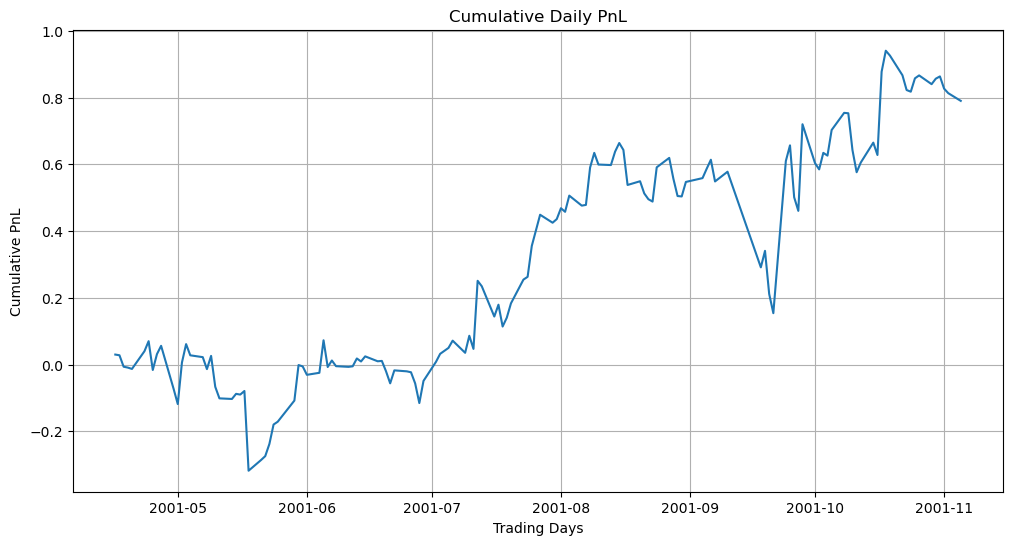

In [5]:
import matplotlib.pyplot as plt
cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

In [ ]:
def calculate_Return_Rate(R_curr: pd.DataFrame, window_width: int):
    return 'hello world'

In [ ]:
print(calculate_Return_Rate(pd.DataFrame(), 5))  # Example usage, replace with actual DataFrame